In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller

In [3]:
df=pd.read_csv('dmart.csv')

In [4]:
print(df.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [5]:
print(df.tail())

      Store  Dept        Date  Weekly_Sales  IsHoliday
1996      1    14  2012-09-21      12193.80      False
1997      1    14  2012-09-28      12037.66      False
1998      1    14  2012-10-05      14381.21      False
1999      1    14  2012-10-12      11450.64      False
2000      1    14  2012-10-19      12035.51      False


In [6]:
ts= df['Weekly_Sales']

<Axes: >

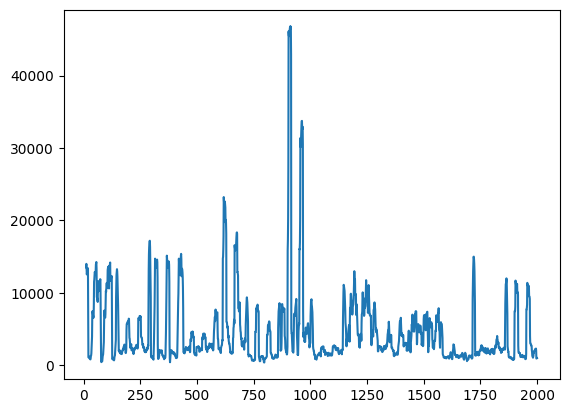

In [7]:
ts.rolling(12).std().plot()

<Axes: >

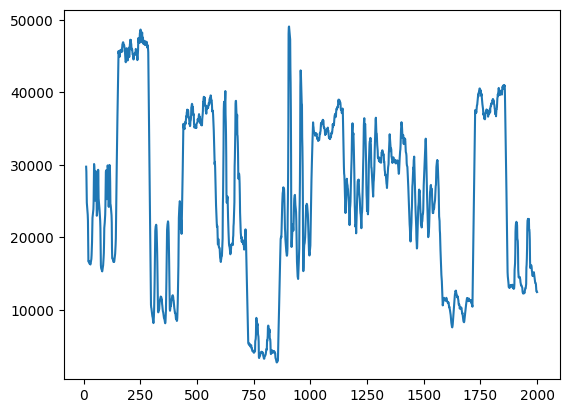

In [8]:
ts.rolling(12).mean().plot()

In [9]:
df['Date']=pd.to_datetime(df['Date'])
print(df.head())
print(df.tail())
df.set_index(['Date'],inplace=True)  #we need data based on Month so we are making it as an index for easy use 
print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False
      Store  Dept       Date  Weekly_Sales  IsHoliday
1996      1    14 2012-09-21      12193.80      False
1997      1    14 2012-09-28      12037.66      False
1998      1    14 2012-10-05      14381.21      False
1999      1    14 2012-10-12      11450.64      False
2000      1    14 2012-10-19      12035.51      False
            Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False


<Axes: xlabel='Date'>

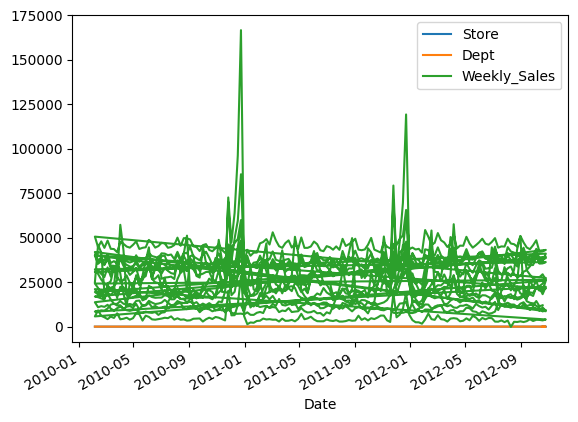

In [10]:
df.plot()

In [11]:
pvalue=adfuller(ts)
print(pvalue)

(-3.3889290330790134, 0.011342119833868895, 23, 1977, {'1%': -3.433661993406868, '5%': -2.8630030510232647, '10%': -2.567548867394869}, 40369.33552568077)


In [12]:
pvalue

(-3.3889290330790134,
 0.011342119833868895,
 23,
 1977,
 {'1%': -3.433661993406868,
  '5%': -2.8630030510232647,
  '10%': -2.567548867394869},
 40369.33552568077)

In [13]:
ts2=df['Weekly_Sales']

In [14]:
df['First Diff']=ts2-ts2.shift(1)

In [15]:
r=adfuller(df['First Diff'].dropna())

In [16]:
r

(-13.66041140538516,
 1.525232702428757e-25,
 23,
 1976,
 {'1%': -3.4336636717018405,
  '5%': -2.8630037919874423,
  '10%': -2.567549261922421},
 40358.77439124846)

In [17]:
df['Seasonal Diff']=ts2-ts2.shift(12)

In [18]:
r=adfuller(df['Seasonal Diff'].dropna())

In [19]:
r

(-8.390194474701826,
 2.378117029889265e-13,
 25,
 1963,
 {'1%': -3.4336856453443994,
  '5%': -2.863013493272342,
  '10%': -2.5675544273932758},
 40671.846003925544)

In [20]:
df['Seasonal first Diff']=df['First Diff']-df['First Diff'].shift(12)

In [21]:
r=adfuller(df['Seasonal first Diff'].dropna())

In [22]:
r

(-16.64387296913521,
 1.6258288750986034e-29,
 26,
 1961,
 {'1%': -3.43368905179724, '5%': -2.86301499720276, '10%': -2.567555228165442},
 40708.46010134279)

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.graphics.tsaplots import plot_acf   #Auto Correlation PLOT
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
df

,Store,Dept,Weekly_Sales,IsHoliday,First Diff,Seasonal Diff,Seasonal first Diff
Date,,,,,,,
2010-02-05,1,1,24924.50,False,NaN,NaN,NaN
2010-02-12,1,1,46039.49,True,21114.99,NaN,NaN
2010-02-19,1,1,41595.55,False,-4443.94,NaN,NaN
2010-02-26,1,1,19403.54,False,-22192.01,NaN,NaN
2010-03-05,1,1,21827.90,False,2424.36,NaN,NaN
...,...,...,...,...,...,...,...
2012-09-21,1,14,12193.80,False,597.70,-4765.04,-3202.76
2012-09-28,1,14,12037.66,False,-156.14,-6981.38,-2216.34
2012-10-05,1,14,14381.21,False,2343.55,48.49,7029.87


In [25]:
decompose=seasonal_decompose(x=df['Weekly_Sales'],model='additive',period=12)

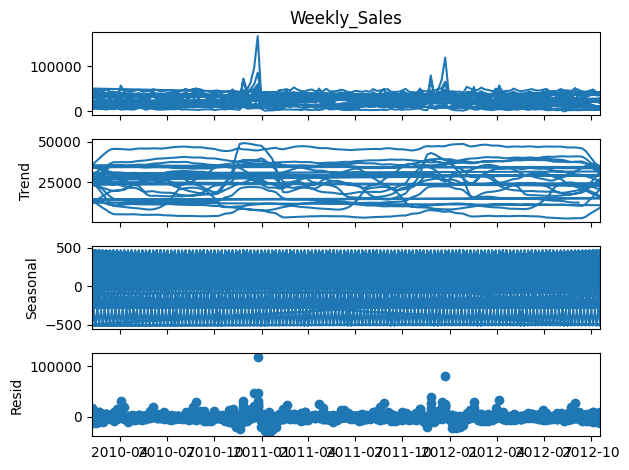

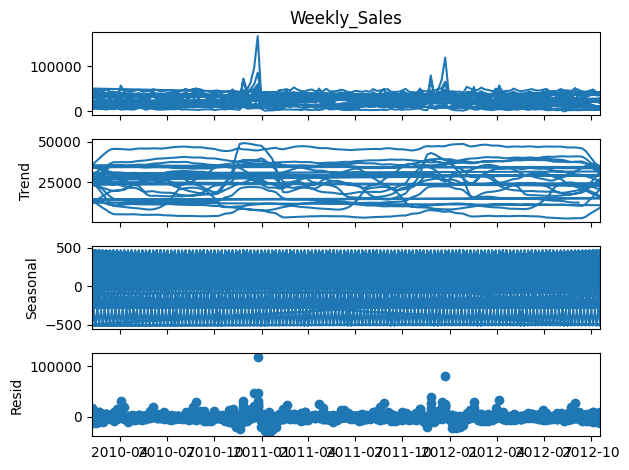

In [26]:
decompose.plot()

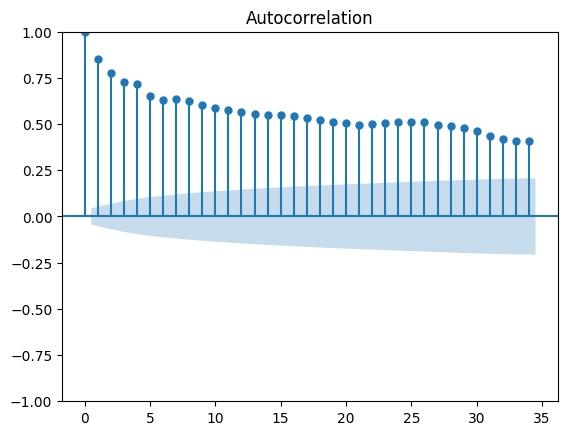

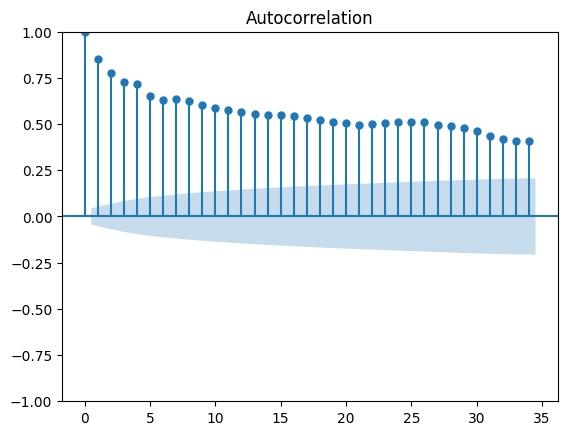

In [27]:
plot_acf(df.Weekly_Sales)

In [28]:
#Splitting data into training and testing
print(df.describe())

        Store         Dept   Weekly_Sales     First Diff  Seasonal Diff  \
count  2001.0  2001.000000    2001.000000    2000.000000    1989.000000   
mean      1.0     7.496752   25479.814758      -6.444495    -104.335963   
std       0.0     4.030523   13737.618740    7426.510724   12727.980396   
min       1.0     1.000000    -139.650000 -139264.660000 -143946.130000   
25%       1.0     4.000000   14092.030000   -1663.317500   -3931.710000   
50%       1.0     7.000000   24213.180000      14.260000    -189.640000   
75%       1.0    11.000000   36222.740000    1735.135000    3474.050000   
max       1.0    14.000000  166697.720000   70499.600000  150215.930000   

       Seasonal first Diff  
count          1988.000000  
mean              3.872425  
std           10386.847543  
min         -139133.830000  
25%           -3225.102500  
50%            -192.870000  
75%            3081.540000  
max          136471.070000  


In [29]:
training=df.iloc[0:1374,:]

In [30]:
testing=df.iloc[1374:,:]

In [31]:
testing.describe()

,Store,Dept,Weekly_Sales,First Diff,Seasonal Diff,Seasonal first Diff
count,627.0,627.000000,627.000000,627.000000,627.000000,627.000000
mean,1.0,12.274322,23212.303062,-30.305215,-342.302169,0.011037
std,0.0,1.283227,11486.064292,4348.315340,8632.379245,6249.291139
min,1.0,10.000000,6605.120000,-26148.470000,-33696.440000,-32651.780000
25%,1.0,11.000000,12554.490000,-1497.705000,-3500.980000,-2891.145000
50%,1.0,12.000000,20462.680000,13.260000,-271.960000,-301.240000
75%,1.0,13.000000,35321.080000,1491.930000,3050.195000,2572.745000
max,1.0,14.000000,47983.720000,33310.880000,35039.860000,34003.350000


In [32]:
training.describe()

,Store,Dept,Weekly_Sales,First Diff,Seasonal Diff,Seasonal first Diff
count,1374.0,1374.000000,1374.000000,1373.000000,1362.000000,1361.00000
mean,1.0,5.316594,26514.552627,4.451843,5.212357,5.65133
std,0.0,2.780811,14537.328082,8469.381410,14223.957890,11817.33167
min,1.0,1.000000,-139.650000,-139264.660000,-143946.130000,-139133.83000
25%,1.0,3.000000,16288.962500,-1712.170000,-4260.202500,-3490.88000
50%,1.0,5.000000,26340.130000,15.260000,-109.050000,-116.07000
75%,1.0,8.000000,36459.172500,1872.610000,3663.562500,3490.27000
max,1.0,10.000000,166697.720000,70499.600000,150215.930000,136471.07000


In [33]:
model=ExponentialSmoothing(endog=training.Weekly_Sales,trend='add',seasonal='add',seasonal_periods=12).fit()

/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [34]:
prediction=model.forecast(steps=18)


/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [35]:
prediction.head()

1374    32461.454092
1375    32170.286993
1376    31426.600858
1377    30468.477666
1378    30518.237664
dtype: float64

In [36]:
prediction.tail()

1387    32109.813359
1388    31366.127225
1389    30408.004032
1390    30457.764031
1391    29588.106971
dtype: float64

<Axes: >

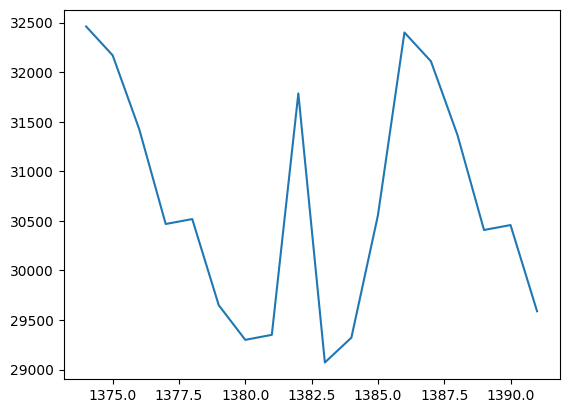

In [37]:
#training['Weekly_Sales'].plot()
#testing['Weekly_Sales'].plot()
prediction.plot()

/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/maria/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Absolute Error: 11487.847630122034


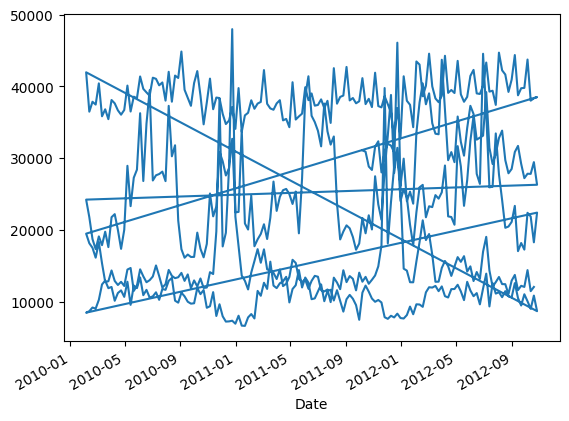

In [38]:
from sklearn.metrics import mean_absolute_error

# Assuming model is already trained
# Splitting data
training = df.iloc[:1374]
testing = df.iloc[1374:]

# Making predictions
prediction = model.forecast(steps=len(testing))

# Plotting
#training['Weekly_Sales']['2010-10-29':].plot()
testing['Weekly_Sales'].plot()

# Calculating mean absolute error
mae = mean_absolute_error(testing['Weekly_Sales'], prediction)
print("Mean Absolute Error:", mae)


<Axes: xlabel='Date'>

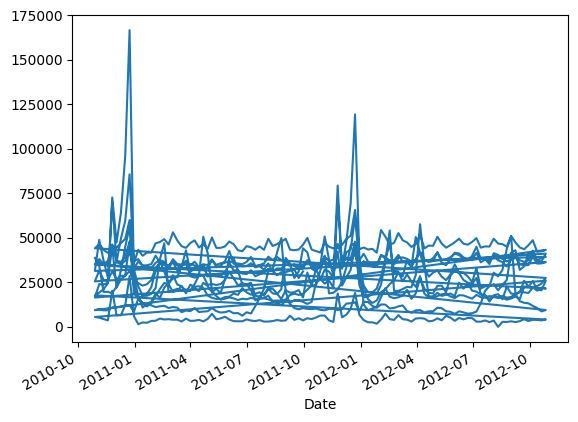

In [39]:
training['Weekly_Sales']['2010-10-29':].plot()

In [40]:
mae=mae*0.01
print(mae)

114.87847630122035
